In [2]:
import pandas as pd

# 데이터 파일 불러오기
hotel_data = pd.read_csv('hotel_booking_data_cleaned.csv')

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [3]:
# 데이터 전처리 단계

# 결측치 확인
missing_values = hotel_data.isnull().sum()

# 범주형 변수를 수치형으로 변환하기 위해 데이터 타입 확인
categorical_columns = hotel_data.select_dtypes(include=['object']).columns

missing_values, categorical_columns


(hotel                                  0
 is_canceled                            0
 lead_time                              0
 arrival_date_year                      0
 arrival_date_month                     0
 arrival_date_week_number               0
 arrival_date_day_of_month              0
 stays_in_weekend_nights                0
 stays_in_week_nights                   0
 adults                                 0
 children                               4
 babies                                 0
 meal                                   0
 country                              488
 market_segment                         0
 distribution_channel                   0
 is_repeated_guest                      0
 previous_cancellations                 0
 previous_bookings_not_canceled         0
 reserved_room_type                     0
 assigned_room_type                     0
 booking_changes                        0
 deposit_type                           0
 agent                            

In [4]:
from sklearn.preprocessing import LabelEncoder

# 결측치 처리
hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)
hotel_data.drop(columns=['agent', 'company'], inplace=True)  
# 많은 결측치를 가진 열 제거

# 범주형 변수 수치형으로 변환
le = LabelEncoder()
for col in categorical_columns:
    if col in hotel_data.columns:
        hotel_data[col] = le.fit_transform(hotel_data[col])

# 예측에 필요하지 않은 열 제거
hotel_data.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

# 전처리된 데이터 확인
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,27,1,0,0,2,...,0,2,2,3,0,0,2,0.0,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,0,2,2,4,0,0,2,0.0,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,2,0,0,0,2,75.0,0,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,0,2,75.0,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,0,2,98.0,0,1


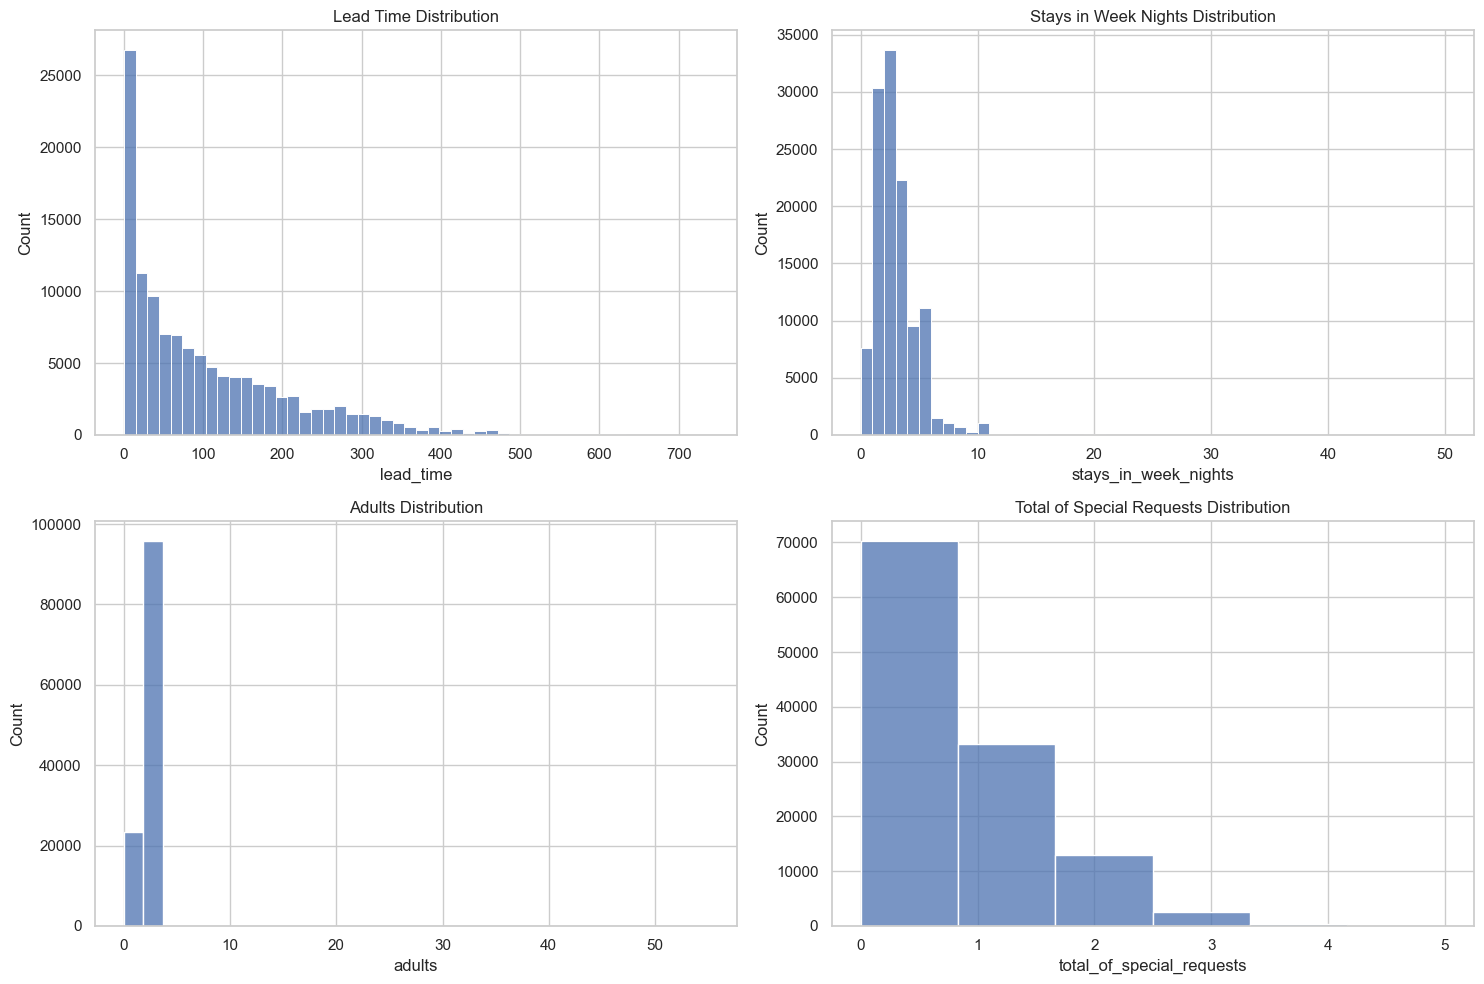

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
meal                              0.017678
arrival_date_year                 0.016660
arrival_dat

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Exploratory Data Analysis (EDA)

# Plotting the distribution of some key variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Lead time distribution
sns.histplot(hotel_data['lead_time'], bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Lead Time Distribution')

# Distribution of stays (week nights)
sns.histplot(hotel_data['stays_in_week_nights'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Stays in Week Nights Distribution')

# Adults distribution
sns.histplot(hotel_data['adults'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Adults Distribution')

# Total of special requests distribution
sns.histplot(hotel_data['total_of_special_requests'], bins=6, ax=axes[1, 1])
axes[1, 1].set_title('Total of Special Requests Distribution')

plt.tight_layout()
plt.show()

# Checking the relationship between cancellation and some key features
cancellation_corr = hotel_data.corr()['is_canceled']
cancellation_corr.abs().sort_values(ascending=False)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handling missing values
hotel_data_clean = hotel_data.dropna()

# Converting categorical variables to numeric
label_encoders = {}
for column in hotel_data_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    hotel_data_clean[column] = le.fit_transform(hotel_data_clean[column])
    label_encoders[column] = le

# Splitting the dataset into features (X) and target variable (y)
X = hotel_data_clean.drop('is_canceled', axis=1)
y = hotel_data_clean['is_canceled']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head(), y_train.head()


(        hotel  lead_time  arrival_date_year  arrival_date_month  \
 9710        1        122               2016                   2   
 40307       0         20               2015                   5   
 110051      0         87               2017                   0   
 22999       1          0               2017                   3   
 8344        1         42               2016                  11   
 
         arrival_date_week_number  arrival_date_day_of_month  \
 9710                          53                         27   
 40307                         30                         22   
 110051                        16                         16   
 22999                          5                          2   
 8344                          39                         23   
 
         stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
 9710                          0                     4       2       0.0  ...   
 40307                         0          

In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the features by their importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)  # Displaying the top 10 features by importance


,Feature,Importance
21,deposit_type,0.141123
1,lead_time,0.131264
12,country,0.109446
24,adr,0.082957
5,arrival_date_day_of_month,0.057217
26,total_of_special_requests,0.056495
4,arrival_date_week_number,0.053627
13,market_segment,0.050861
7,stays_in_week_nights,0.036415
16,previous_cancellations,0.030389


In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculating accuracy and other performance metrics
accuracy = accuracy_score(y_test, y_pred)
performance_report = classification_report(y_test, y_pred)

accuracy, performance_report


(0.8897171734092749,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.91     22478\n           1       0.89      0.80      0.84     13339\n\n    accuracy                           0.89     35817\n   macro avg       0.89      0.87      0.88     35817\nweighted avg       0.89      0.89      0.89     35817\n')